In [1]:
import tensorflow as tf
from keras import layers, datasets, models
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import pickle
import numpy as np

for i in range(1,6):
    path = 'data_batch_' + str(i)
    with open(path, mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
    if i == 1:  
        X_train = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
        y_train = batch['labels']
    else:
        X_train_temp = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
        y_train_temp = batch['labels']
        X_train = np.concatenate((X_train,X_train_temp),axis = 0)
        y_train = np.concatenate((y_train,y_train_temp),axis=0)

path = 'test_batch'
with open(path,'rb') as file:
    # note the encoding type is 'latin1'
    batch = pickle.load(file, encoding='latin1')
    X_test = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
    y_test = batch['labels']

In [25]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
y_train = y_train.reshape(-1,) #flatteiing the array

In [27]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
def load_image(X,y,index):
    plt.figure(figsize = (3,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

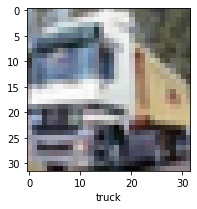

In [49]:
load_image(X_train, y_train, 1)

In [33]:
X_train = X_train/255
X_test = X_test/255

In [34]:
cnn_model = models.Sequential([
    #convolution Layer first
    layers.Conv2D(filters=32, activation = 'relu', kernel_size = (3,3), input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    #convolution Layer first
    layers.Conv2D(filters=64, activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    #two layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [35]:
cnn_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

In [36]:
cnn_model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4700 - accuracy: 0.4733
Epoch 2/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1179 - accuracy: 0.6085
Epoch 3/5
1563/1563 [==============================] - 76s 48ms/step - loss: 0.9816 - accuracy: 0.6602
Epoch 4/5
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8963 - accuracy: 0.6890
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8320 - accuracy: 0.7108


In [47]:
y_test = np.array(y_test).reshape(-1,)

In [48]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9325 - accuracy: 0.6843


[0.9325095415115356, 0.6843000054359436]

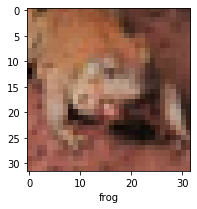

In [51]:
load_image(X_test, y_test, 5)

In [52]:
y_predicted = cnn_model.predict(X_test)
y_predicted[:3]

array([[2.0627478e-02, 2.3837944e-03, 2.2508247e-02, 8.0742848e-01,
        4.8677609e-03, 9.5682263e-02, 2.0702712e-02, 3.3305346e-03,
        2.1999732e-02, 4.6894280e-04],
       [2.2665548e-01, 1.0765200e-01, 5.6997480e-05, 9.0941230e-06,
        7.7836548e-06, 2.9657761e-07, 1.0370181e-06, 4.4899680e-06,
        6.6537559e-01, 2.3730204e-04],
       [1.2251429e-01, 1.5428284e-01, 2.9355616e-03, 1.3400938e-03,
        9.6378918e-04, 1.5224454e-04, 4.2790102e-04, 2.8803697e-04,
        7.0715606e-01, 9.9390540e-03]], dtype=float32)

In [68]:
X_test.shape

(10000, 32, 32, 3)

In [54]:
y_predicted = [np.argmax(i) for i in y_predicted]

In [59]:
y_predicted[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 5, 8, 6]

In [60]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6])

In [62]:
matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[835,  12,  28,  21,   7,   1,   7,  11,  64,  14],
       [ 51, 815,   4,  10,   8,   3,   5,   8,  31,  65],
       [124,   5, 503,  89,  89,  53,  75,  43,  12,   7],
       [ 42,  17,  55, 552,  62, 122,  73,  43,  23,  11],
       [ 48,   4,  61,  88, 609,  31,  59,  84,  16,   0],
       [ 23,   4,  44, 244,  56, 507,  36,  70,  13,   3],
       [ 18,   6,  38,  68,  32,  18, 797,  10,  10,   3],
       [ 37,   4,  33,  46,  53,  44,   8, 762,   4,   9],
       [124,  28,  12,  22,   9,   6,   2,   7, 776,  14],
       [ 89, 105,   9,  21,  11,   3,   4,  30,  41, 687]])>

Text(69.0, 0.5, 'Real Truth!!!')

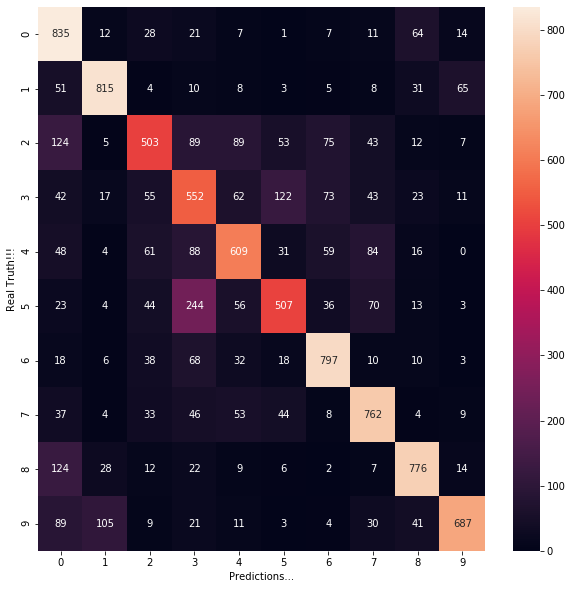

In [63]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predictions...')
plt.ylabel('Real Truth!!!')

In [64]:
from PIL import Image
from numpy import asarray
image = Image.open('images_cars.jpg')
data = asarray(image)/255
print(data)

[[[0.87843137 0.8745098  0.89411765]
  [0.79215686 0.78823529 0.80784314]
  [0.77254902 0.76862745 0.78823529]
  ...
  [0.89019608 0.8627451  0.89019608]
  [0.89803922 0.85882353 0.89019608]
  [0.9254902  0.88627451 0.91764706]]

 [[0.89411765 0.89803922 0.91372549]
  [0.87058824 0.86666667 0.88627451]
  [0.85490196 0.85098039 0.87058824]
  ...
  [0.81960784 0.8        0.82352941]
  [0.8        0.77254902 0.8       ]
  [0.84705882 0.80784314 0.83921569]]

 [[0.86666667 0.87058824 0.89019608]
  [0.90980392 0.91372549 0.93333333]
  [0.9372549  0.94117647 0.95686275]
  ...
  [0.75686275 0.7372549  0.76078431]
  [0.79607843 0.76862745 0.79607843]
  [0.87843137 0.85098039 0.87843137]]

 ...

 [[0.18823529 0.33333333 0.26666667]
  [0.17254902 0.29411765 0.23529412]
  [0.16470588 0.25098039 0.20392157]
  ...
  [0.37647059 0.3372549  0.30196078]
  [0.36862745 0.34117647 0.30196078]
  [0.36078431 0.34509804 0.30196078]]

 [[0.31372549 0.35294118 0.31764706]
  [0.29803922 0.31764706 0.29411765]


In [65]:
print(data.shape)

(32, 32, 3)


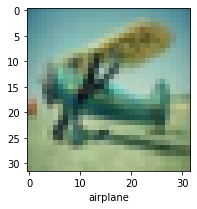

In [84]:
load_image(X_test, y_test, 2548)

In [85]:
classes[y_predicted[2548]]

'airplane'